In [63]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [64]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [65]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [66]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [67]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [68]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [69]:
# Assign the measurement class to a variable called `Measurement` and
Measurement = Base.classes.measurement
# assign the station class to a variable called `Station`
Station = Base.classes.station

In [70]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [71]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [72]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
subquery = session.query(func.max(Measurement.date)).scalar()
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= func.date(subquery, '-12 months')).order_by(Measurement.date)

# Execute the query
results = query.all()

# Print the results (for test)
# for result in results:
#     print(result.date, result.prcp)

In [73]:
# Calculate the date one year from the last date in data set.
max_date = session.query(func.max(Measurement.date)).scalar()
one_year_ago = session.query(func.date(max_date, '-1 year')).scalar()
print("One year ago from the last date in the dataset:", one_year_ago)

One year ago from the last date in the dataset: 2016-08-23


In [74]:
# Perform a query to retrieve the data and precipitation scores
# Print the results 
for result in results:
    print(result.date, result.prcp)

2016-08-23 0.0
2016-08-23 3.8
2016-08-23 1.3
2016-08-23 None
2016-08-23 0.5
2016-08-23 45.5
2016-08-23 17.8
2016-08-24 2.0
2016-08-24 54.6
2016-08-24 57.9
2016-08-24 None
2016-08-24 31.0
2016-08-24 54.6
2016-08-24 36.8
2016-08-25 2.0
2016-08-25 2.0
2016-08-25 0.0
2016-08-25 0.0
2016-08-25 5.3
2016-08-25 1.5
2016-08-25 2.8
2016-08-26 0.0
2016-08-26 0.8
2016-08-26 0.5
2016-08-26 1.0
2016-08-26 0.0
2016-08-26 0.3
2016-08-27 0.0
2016-08-27 4.6
2016-08-27 0.5
2016-08-27 0.0
2016-08-27 3.0
2016-08-27 None
2016-08-28 0.3
2016-08-28 3.6
2016-08-28 3.6
2016-08-28 3.6
2016-08-28 15.2
2016-08-28 52.6
2016-08-29 0.0
2016-08-29 4.3
2016-08-29 1.0
2016-08-29 None
2016-08-29 0.0
2016-08-29 8.9
2016-08-29 22.9
2016-08-30 0.0
2016-08-30 0.0
2016-08-30 0.5
2016-08-30 0.0
2016-08-30 0.0
2016-08-30 1.3
2016-08-31 3.3
2016-08-31 2.5
2016-08-31 None
2016-08-31 None
2016-08-31 6.4
2016-08-31 6.1
2016-08-31 62.5
2016-09-01 0.0
2016-09-01 0.0
2016-09-01 0.0
2016-09-01 None
2016-09-01 0.5
2016-09-01 0.3
2016-09

In [75]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

# Create a Pandas DataFrame with explicitly set column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Print the DataFrame
print(df)

         date     precipitation
0     2016-08-23       0.0     
1     2016-08-23       3.8     
2     2016-08-23       1.3     
3     2016-08-23       NaN     
4     2016-08-23       0.5     
...          ...            ...
2225  2017-08-22      12.7     
2226  2017-08-23       0.0     
2227  2017-08-23       0.0     
2228  2017-08-23       2.0     
2229  2017-08-23      11.4     

[2230 rows x 2 columns]


In [76]:
# Sort the dataframe by date
df_sorted = df.sort_values(by='date')

# Print the sorted DataFrame
print(df_sorted)

         date     precipitation
0     2016-08-23       0.0     
1     2016-08-23       3.8     
2     2016-08-23       1.3     
3     2016-08-23       NaN     
4     2016-08-23       0.5     
...          ...            ...
2225  2017-08-22      12.7     
2228  2017-08-23       2.0     
2226  2017-08-23       0.0     
2227  2017-08-23       0.0     
2229  2017-08-23      11.4     

[2230 rows x 2 columns]


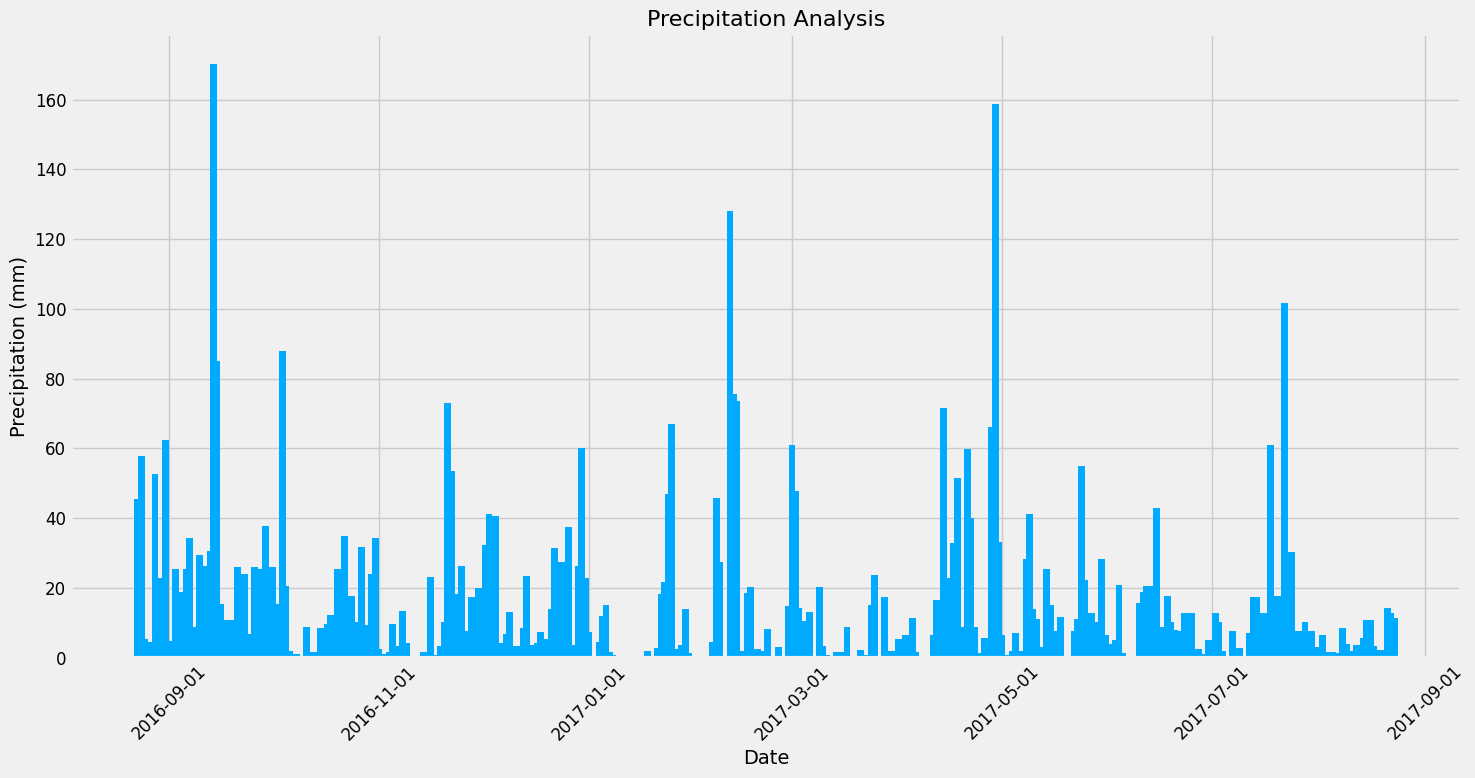

In [77]:
# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.dates as mdates

# Convert the 'date' column to datetime format for better plotting
df_sorted['date'] = pd.to_datetime(df_sorted['date'])

# Set the figure size for better visibility
plt.figure(figsize=(15, 8))  # Adjusted for wider and more detailed view

# Plot the data using a bar graph for precipitation
plt.bar(df_sorted['date'], df_sorted['precipitation'], color='#00ABFF', width=2)

# Add labels and title to the plot
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.title('Precipitation Analysis', fontsize=16)

# Format the ticks to show year, month, and day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Improve the ticks for a cleaner look
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)  # Optional: Adds a grid for easier readability

# Ensure everything fits without clipping
plt.tight_layout()

# Show the plot
plt.show()

In [78]:
# Use Pandas to calculate the summary statistics for the precipitation data

# Calculate the summary statistics for the precipitation column
precipitation_stats = df_sorted['precipitation'].describe()


# Convert the series to a DataFrame, reset the index to create two columns
precipitation_stats_df = pd.DataFrame(precipitation_stats).reset_index()

# Rename the columns to match your requirements
precipitation_stats_df.columns = ['', 'precipitation']

# Display the DataFrame
print(precipitation_stats_df.to_string(index=False))


       precipitation
count  2021.000000  
 mean     4.505888  
  std    11.713487  
  min     0.000000  
  25%     0.000000  
  50%     0.500000  
  75%     3.300000  
  max   170.200000  


# Exploratory Station Analysis

In [79]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.id)).all()
print(total_stations)

[(9,)]


In [80]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(
    Measurement.station,
    func.count(Measurement.station)
).group_by(
    Measurement.station
).order_by(
    func.count(Measurement.station).desc()
).all()

print("[")
for station in most_active_stations:
    print(f" ('{station[0]}', {station[1]}),")
print("]")

[
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511),
]


In [81]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Fetch the most active station ID from the list

# most_active_station_id = session.query(
#     Measurement.station,
#     func.count(Measurement.station)
# ).group_by(
#     Measurement.station
# ).order_by(
#     func.count(Measurement.station).desc()
# ).first()[0]  # Fetch the station ID of the most active station
most_active_station_id = most_active_stations[0][0]


# Using the most active station ID, calculate the lowest, highest, and average temperature
temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station_id).all()

# Format the output to show as a list with a single tuple containing the results
print(temperature_stats)


[(12.2, 29.4, 22.03582251082252)]


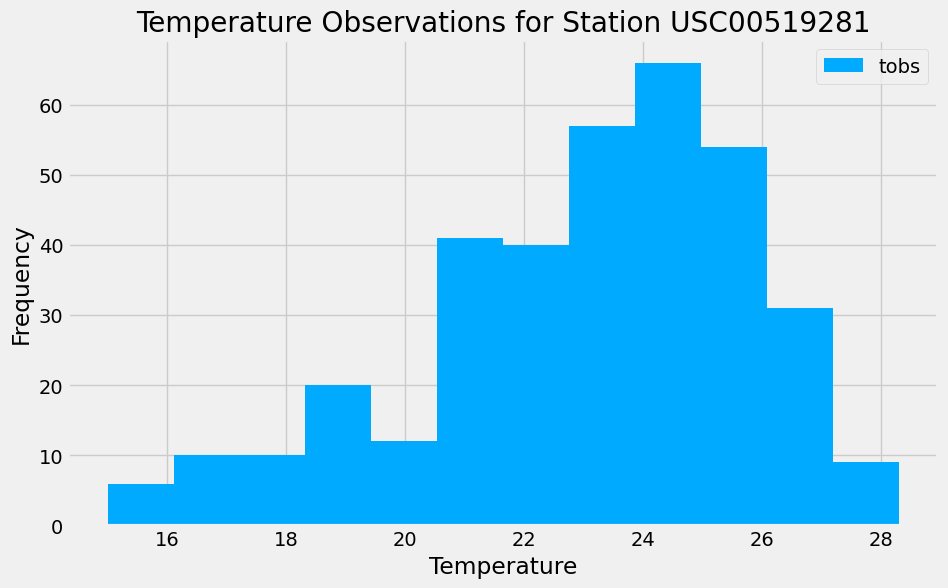

In [85]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Find the latest date of data for the most active station
latest_date = session.query(func.max(Measurement.date)).filter(Measurement.station == most_active_station_id).scalar()

# Calculate the date one year before the latest data date
from datetime import datetime, timedelta
latest_date = datetime.strptime(latest_date, '%Y-%m-%d')
date_one_year_ago = latest_date - timedelta(days=365)

# Query the last 12 months of temperature observation data for this station
results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= date_one_year_ago).all()

# Convert query results to a DataFrame
temperature_df = pd.DataFrame(results, columns=['date', 'temperature'])

# Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(temperature_df['temperature'], bins=12, color='#00ABFF', alpha=1, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station_id}')

plt.legend()
plt.grid(True)
plt.show()


# Close Session

In [83]:
# Close Session
session.close()
